# <center> Статистический и визуальный анализ данных
## <center>Практическое задание. Статистический и визуальный анализ данных по пассажирам "Титаника".

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

%matplotlib inline

**Считываем обучающую выборку.**

Положите выданный вам файл с данными на Google Drive. В ячейке ниже смонтируйте диск и пропишите путь до папки, в которой лежит файл с данными.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Укажите тут ваш путь
DATA_PATH = Path("/content/drive/MyDrive/Colab Notebooks/")

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv(DATA_PATH / "data_10.csv")
print(train_df.info())
train_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Survived    500 non-null    int64  
 2   Pclass      500 non-null    int64  
 3   Name        500 non-null    object 
 4   Sex         500 non-null    object 
 5   Age         395 non-null    float64
 6   SibSp       500 non-null    int64  
 7   Parch       500 non-null    int64  
 8   Ticket      500 non-null    object 
 9   Fare        500 non-null    float64
 10  Cabin       104 non-null    object 
 11  Embarked    498 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 47.0+ KB
None


,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S
1,1,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C


In [ ]:
train_df.describe(include='all')

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,500.000000,500.000000,500.000000,500,500,395.000000,500.000000,500.000000,500,500.000000,104,498
unique,NaN,NaN,NaN,500,2,NaN,NaN,NaN,428,NaN,91,3
top,NaN,NaN,NaN,"Lindblom, Miss. Augusta Charlotta",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,326,NaN,NaN,NaN,5,NaN,3,368
mean,249.500000,0.374000,2.344000,NaN,NaN,30.239671,0.476000,0.360000,NaN,30.967099,NaN,NaN
std,144.481833,0.484348,0.826456,NaN,NaN,14.553150,0.999711,0.807281,NaN,46.424577,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,0.670000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,124.750000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,249.500000,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.400000,NaN,NaN
75%,374.250000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,29.775000,NaN,NaN


# Статистический анализ

**1. Сколько мужчин / женщин находилось на борту?**

*Напишите ответ в виде двух чисел, которые соответствуют следующим значениям:*
```
326 мужчин и 174 женщин
```

In [ ]:
# Ваш код здесь
# Подсчет количества мужчин и женщин на борту
gender_counts = train_df['Sex'].value_counts()

# Вывод результатов
print(gender_counts['male'], "мужчин")
print(gender_counts['female'], "женщин")

326 мужчин
174 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**

*Напишите ответ в виде одного числа.*

**Ответ: 55**

Распределение по социально-экономическому статусу:
3    286
1    114
2    100
Name: Pclass, dtype: int64
Распределение социально-экономического статуса для мужчин:
3    208
1     63
2     55
Name: Pclass, dtype: int64
Распределение социально-экономического статуса для женщин:
3    78
1    51
2    45
Name: Pclass, dtype: int64
Мужчин 2-го класса: 55 человек


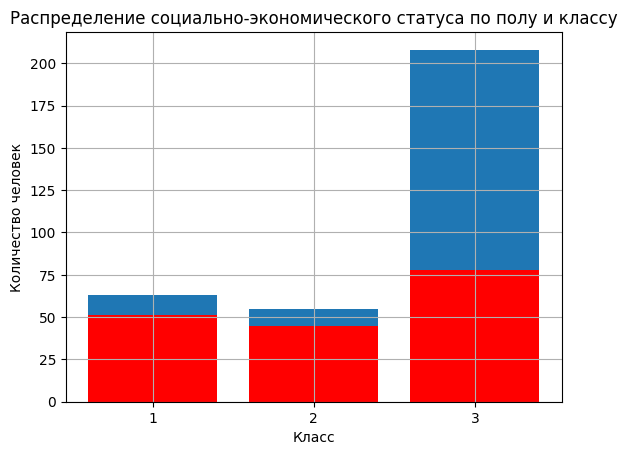

In [ ]:
# Ваш код здесь
# Вывод распределения переменной Pclass
pclass_counts = train_df['Pclass'].value_counts()
print("Распределение по социально-экономическому статусу:")
print(pclass_counts)

# Распределение для мужчин по классам
male_pclass_counts = train_df[train_df['Sex'] == 'male']['Pclass'].value_counts()
print("Распределение социально-экономического статуса для мужчин:")
print(male_pclass_counts)

# Распределение для женщин по классам
female_pclass_counts = train_df[train_df['Sex'] == 'female']['Pclass'].value_counts()
print("Распределение социально-экономического статуса для женщин:")
print(female_pclass_counts)

# Построение гистограммы
plt.bar(male_pclass_counts.index, male_pclass_counts.values, label='Мужчины')
plt.bar(female_pclass_counts.index, female_pclass_counts.values, label='Женщины', color='red')
plt.title("Распределение социально-экономического статуса по полу и классу")
plt.xlabel("Класс")
plt.ylabel("Количество человек")
plt.grid(True)

indexes_array = pclass_counts.index.values
plt.xticks(np.arange(min(indexes_array), max(indexes_array)+1, 1.0))

# Подсчет количества мужчин во 2-м классе
second_class_male = male_pclass_counts[2]
print("Мужчин 2-го класса:", second_class_male, "человек")

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**

*Напишите ответ в виде двух чисел, которые соответствуют следующим значениям:*
```
Медиана = 14.4 и стандартное отклонение = 46.42
```

In [ ]:
# Ваш код здесь
# Вычисление медианы и стандартного отклонения платежей (Fare)
fare_median = train_df['Fare'].median()
fare_std = train_df['Fare'].std()

# Округление до двух десятичных знаков
fare_median = round(fare_median, 2)
fare_std = round(fare_std, 2)

print("Медиана = {} и стандартное отклонение = {}".format(fare_median, fare_std))

Медиана = 14.4 и стандартное отклонение = 46.42


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**

*Напишите ответ в виде двух чисел, которые соответствуют следующим значениям:*

**Да, правда.**
```
40.61% среди молодых и 31.25% среди старых
```

***Подсказка:*** можно создать фиктивный признак - "категория возраста", который будет принимать три возможных значения: "молодой", "средних лет", "старый".

In [ ]:
def age_category(age):
    if pd.isnull(age):
        return 'null'
    elif age < 30:
        return 'young'
    elif age < 60:
        return 'medium-age'
    else:
        return 'old'

train_df["Age_category"] = train_df["Age"].apply(age_category)

In [ ]:
# Ваш код здесь
# Подсчет долей выживших в каждой группе
survived_young = train_df[train_df['Age_category'] == 'young']['Survived'].mean() * 100
survived_old = train_df[train_df['Age_category'] == 'old']['Survived'].mean() * 100

# Вывод результатов
if survived_young > survived_old:
  print("Правда")
else:
  print("Неправда")
print("{:.2f}% среди молодых и {:.2f}% среди старых".format(survived_young, survived_old))



Правда
40.61% среди молодых и 31.25% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**

*Напишите ответ в виде двух чисел, которые соответствуют следующим значениям:*

**Да, правда.**
```
18.10% среди мужчин и 73.56% среди женщин
```

In [ ]:
# Ваш код здесь
# Подсчет долей выживших среди мужчин и женщин
survived_male = train_df[train_df['Sex'] == 'male']['Survived'].mean() * 100
survived_female = train_df[train_df['Sex'] == 'female']['Survived'].mean() * 100

# Вывод результатов
if survived_female > survived_male:
  print("Правда")
else:
  print("Неправда")
print("{:.2f}% среди мужчин и {:.2f}% среди женщин".format(survived_male, survived_female))


Правда
18.10% среди мужчин и 73.56% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**

*Напишите в ответ имя мужчины (без социального статуса, фамилии и второго имени/отчества). Например:*
```
- Davies
```

In [ ]:
# Ваш код здесь
# Пассажиры мужчины
male_passengers = train_df[train_df['Sex'] == 'male']

# Получение имени
male_passengers = male_passengers.copy()
male_passengers['First_name'] = male_passengers['Name'].apply(lambda x: x.split(',')[0])

# Подсчет количества уникальных имен и выбор самого популярного
most_common_name = male_passengers['First_name'].value_counts().idxmax()

print("Самое популярное имя среди пассажиров Титаника мужского пола --", most_common_name)





Самое популярное имя среди пассажиров Титаника мужского пола -- Davies


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**

*Напишите ответ только Да/Нет.*

**Ответ: Да**

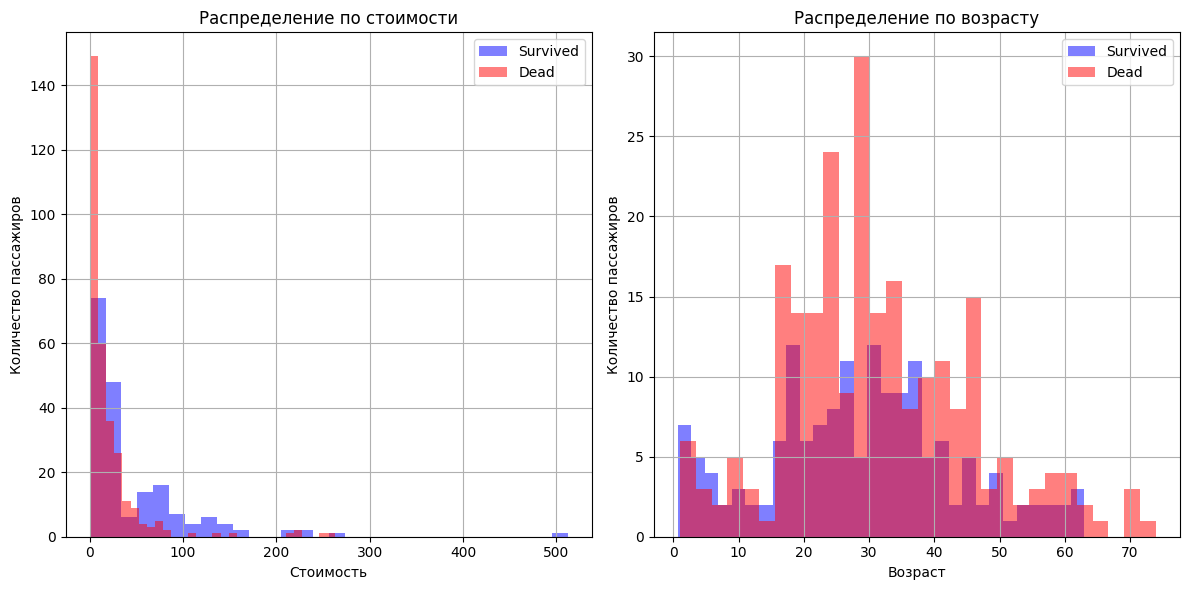

Средний возраст погибших выше, верно?
Да


In [ ]:
# Ваш код здесь

# Разделение данных на спасенных и погибших пассажиров
survived_passengers = train_df[train_df['Survived'] == 1]
dead_passengers = train_df[train_df['Survived'] == 0]

# Построение графиков
plt.figure(figsize=(12, 6))

# График распределения стоимости билетов
plt.subplot(1, 2, 1)
plt.hist(survived_passengers['Fare'], bins=30, alpha=0.5, color='blue', label='Survived')
plt.hist(dead_passengers['Fare'], bins=30, alpha=0.5, color='red', label='Dead')
plt.xlabel('Стоимость')
plt.ylabel('Количество пассажиров')
plt.title('Распределение по стоимости')
plt.grid(True)
plt.legend()

# График распределения возраста
plt.subplot(1, 2, 2)
plt.hist(survived_passengers['Age'].dropna(), bins=30, alpha=0.5, color='blue', label='Survived')
plt.hist(dead_passengers['Age'].dropna(), bins=30, alpha=0.5, color='red', label='Dead')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение по возрасту')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()

# Вычисление среднего возраста для спасенных и погибших пассажиров
mean_age_survived = survived_passengers['Age'].mean()
mean_age_dead = dead_passengers['Age'].mean()

# Сравнение средних возрастов
print("Средний возраст погибших выше, верно?")
if mean_age_dead > mean_age_survived:
    print("Да")
else:
    print("Нет")

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
1. В среднем мужчины 1-го класса старше 40 лет
2. В среднем женщины 1-го класса старше 40 лет
3. Мужчины всех классов в среднем старше женщин того же класса
4. В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса


*Напишите ответ номера верных утверждений.*

Ответ: 1, 3, 4

In [ ]:
# Ваш код здесь
# Группировка данных по классу обслуживания и полу
class_gender_age = train_df.groupby(['Pclass', 'Sex'])['Age'].mean()

# Вывод среднего возраста мужчин и женщин в зависимости от класса обслуживания
print(class_gender_age)

Pclass  Sex   
1       female    35.577778
        male      40.602264
2       female    29.081395
        male      30.029412
3       female    24.995283
        male      27.233333
Name: Age, dtype: float64


# 2. Визуальный анализ

**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [ ]:
train_df = train_df.drop('Cabin', axis=1).dropna()
train_df.shape

(393, 11)

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

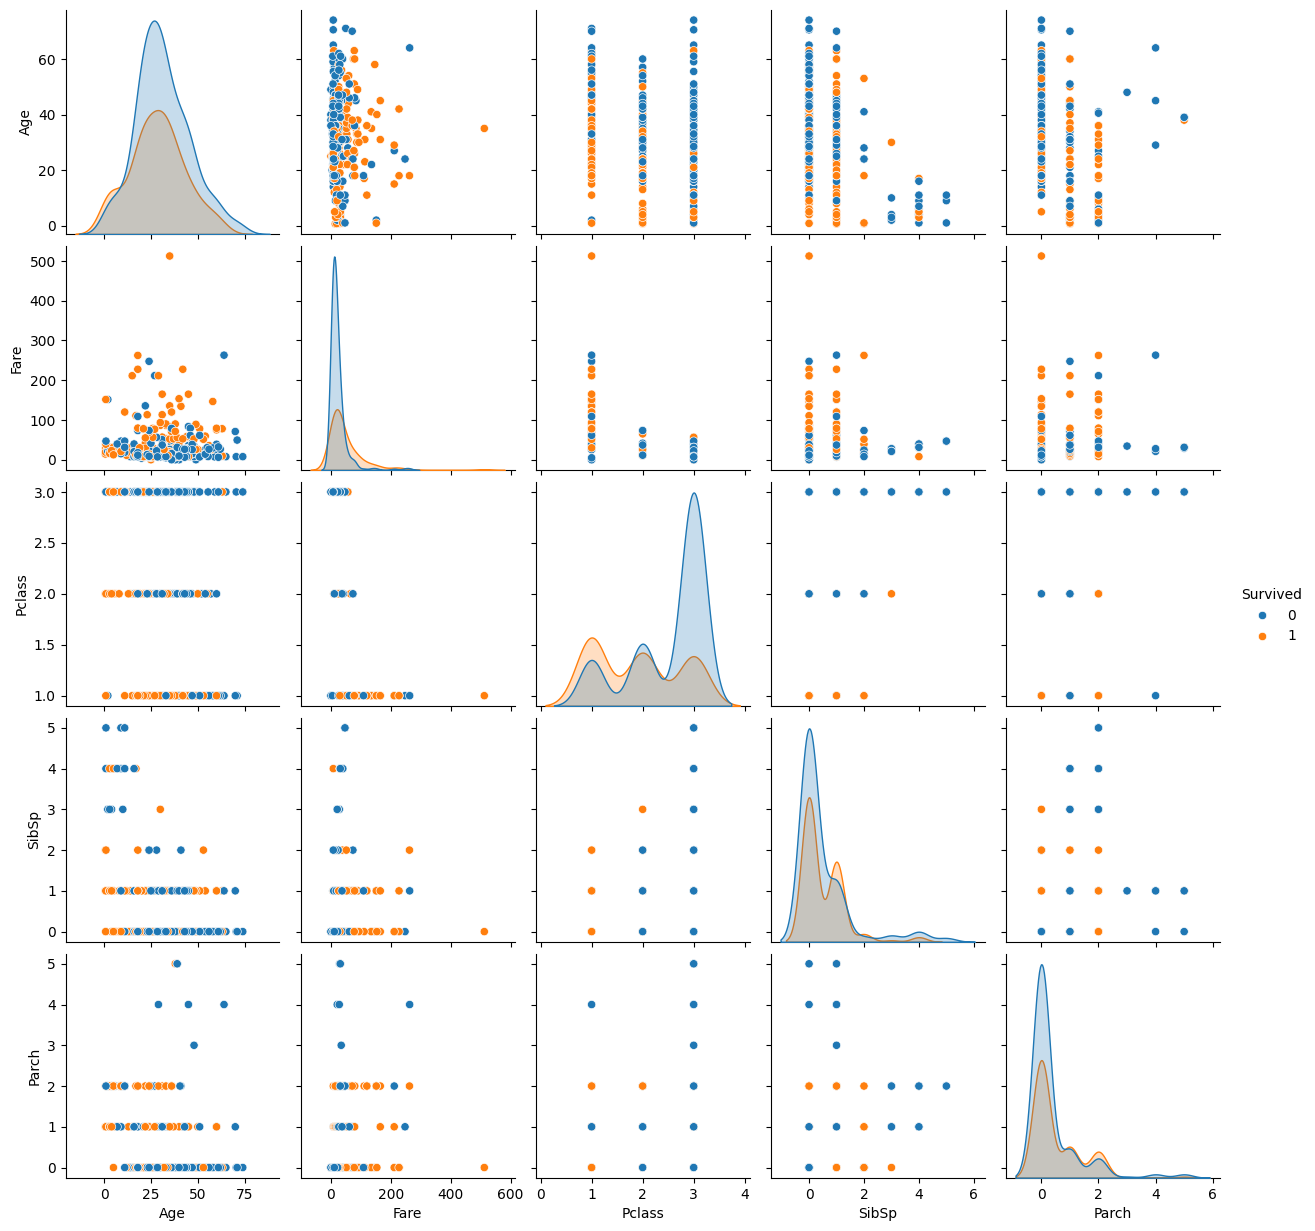

In [ ]:
# Ваш код здесь
selected_features = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']
selected_data = train_df[selected_features]

# Преобразуем признак Sex в числовой формат
selected_data_copy = selected_data.copy()
selected_data_copy['Sex'] = selected_data_copy['Sex'].map({'male': 1, 'female': 0})


# Построение
sns.pairplot(selected_data, hue='Survived')
plt.show()


**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

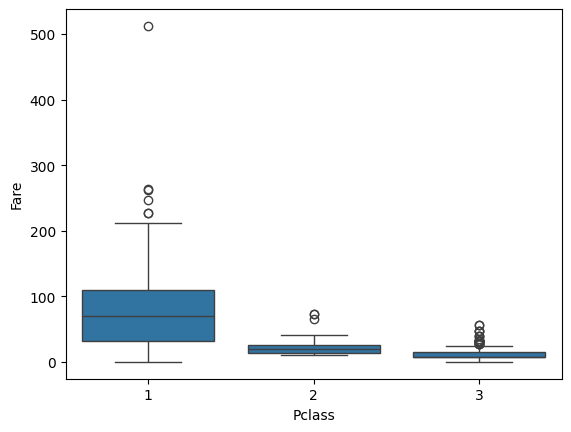

In [ ]:
# Ваш код здесь
sns.boxplot(x='Pclass', y='Fare', data=train_df)

plt.xlabel('Pclass')
plt.ylabel('Fare')

plt.show()

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

<ipython-input-56-a17c6608e34c>:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
<ipython-input-56-a17c6608e34c>:15: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(fare_pclass3_no_out)


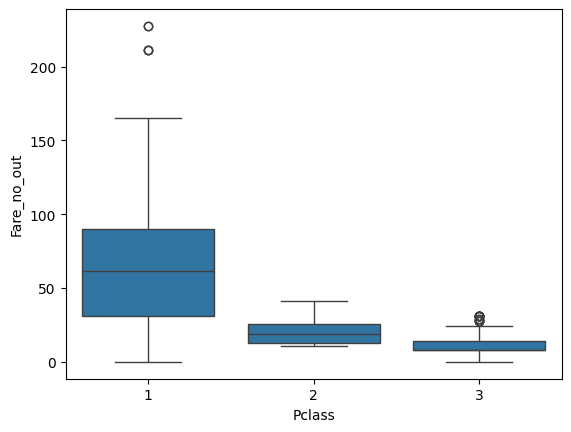

In [ ]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 -
                                    fare_pclass1.mean()).abs()
                                   < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 -
                                    fare_pclass2.mean()).abs()
                                   < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 -
                                    fare_pclass3.mean()).abs()
                                   < 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df);

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

<Axes: xlabel='Survived', ylabel='count'>

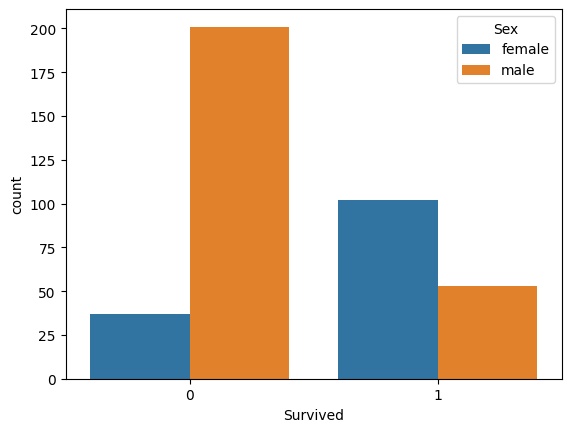

In [ ]:
# Ваш код здесь
sns.countplot(x='Survived', hue='Sex', data=train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

<Axes: xlabel='Survived', ylabel='count'>

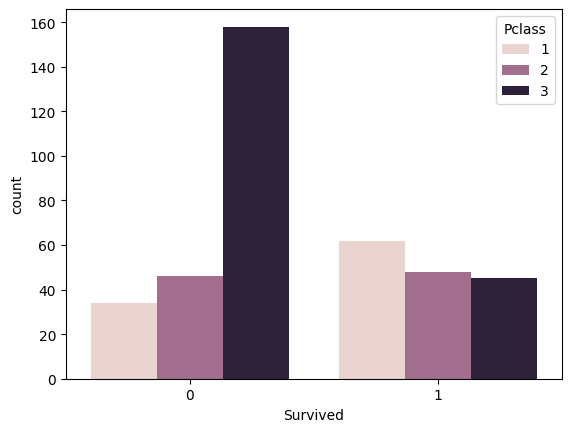

In [ ]:
# Ваш код здесь
sns.countplot(x='Survived', hue='Pclass', data=train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

<Axes: xlabel='Survived', ylabel='Age'>

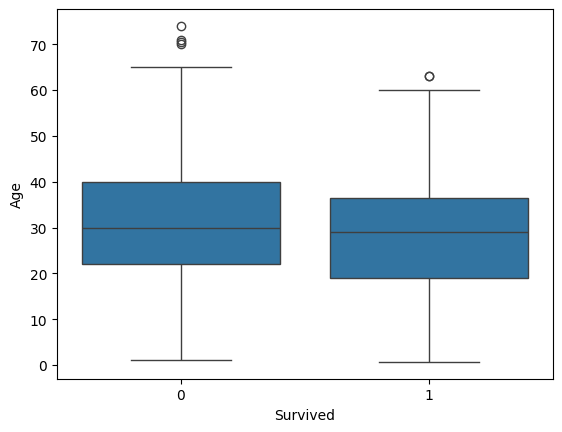

In [ ]:
# Ваш код здесь
sns.boxplot(x='Survived', y='Age', data=train_df)